In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("StudentsPerformance.csv")

In [3]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,172.0,72.0,74
1,female,group C,some college,standard,completed,NaN,NaN,88
2,female,group B,master's degree,standard,none,90.0,95.0,93
3,male,group A,associate's degree,free/reduced,none,47.0,NaN,44
4,male,group C,some college,standard,none,-9.0,78.0,75


In [5]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     1
reading score                  2
writing score                  0
dtype: int64

In [9]:
math_mean = data["math score"].mean()

In [13]:
data["math score"].fillna(math_mean, axis=0, inplace=True)

In [14]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  2
writing score                  0
dtype: int64

In [15]:
reading_mean = data["reading score"].mean()

In [16]:
data["reading score"].fillna(reading_mean, axis=0, inplace=True)

In [44]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [45]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,172.000000,72.000000,74
1,female,group C,some college,standard,completed,66.101101,69.160321,88
2,female,group B,master's degree,standard,none,90.000000,95.000000,93
3,male,group A,associate's degree,free/reduced,none,47.000000,69.160321,44
4,male,group C,some college,standard,none,-9.000000,78.000000,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88.000000,99.000000,95
996,male,group C,high school,free/reduced,none,62.000000,55.000000,55
997,female,group C,high school,free/reduced,completed,59.000000,71.000000,65
998,female,group D,some college,standard,completed,68.000000,78.000000,77


In [18]:
data.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.101101,69.160321,68.054000
std,15.705077,14.580224,15.195657
min,-9.000000,17.000000,10.000000
25%,57.000000,59.000000,57.750000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.000000,79.000000
max,172.000000,100.000000,100.000000


In [19]:
Q1 = data["math score"].quantile(0.25)
Q3 = data["math score"].quantile(0.75)
IQR = Q3- Q1

lowerlimit = Q1 - 1.5 * IQR
upperlimit = Q3 + 1.5 * IQR
lowerlimit, upperlimit

(27.0, 107.0)

In [22]:
outlier = data[(data["math score"]>lowerlimit)&(data["math score"]<upperlimit)]

In [23]:
outlier

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
1,female,group C,some college,standard,completed,66.101101,69.160321,88
2,female,group B,master's degree,standard,none,90.000000,95.000000,93
3,male,group A,associate's degree,free/reduced,none,47.000000,69.160321,44
5,female,group B,associate's degree,standard,none,71.000000,83.000000,78
6,female,group B,some college,standard,completed,88.000000,95.000000,92
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88.000000,99.000000,95
996,male,group C,high school,free/reduced,none,62.000000,55.000000,55
997,female,group C,high school,free/reduced,completed,59.000000,71.000000,65
998,female,group D,some college,standard,completed,68.000000,78.000000,77


In [27]:
outlier["math score"].mean()

66.54261245050719

In [28]:
outlier["math score"].median()

66.0

In [29]:
outlier["math score"].max()

100.0

In [30]:
outlier["math score"].min()

28.0

In [31]:
outlier["math score"].std()

14.47623616359861

In [32]:
outlier["math score"].var()

209.5614134642802

In [33]:
outlier["math score"].skew()

-0.0427891910825792

In [35]:
outlier["math score"].quantile(0.5)

66.0

In [39]:
outlier["math score"].mode()

0    65.0
dtype: float64

In [41]:
outlier.cov()

,math score,reading score,writing score
math score,209.561413,165.079728,168.007973
reading score,165.079728,201.222443,198.883095
writing score,168.007973,198.883095,217.807822


In [46]:
outlier.mode(numeric_only=True,dropna=True)

,math score,reading score,writing score
0,65.0,72.0,74.0
1,NaN,74.0,NaN


In [47]:
outlier.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
1,female,group C,some college,standard,completed,66.101101,69.160321,88
2,female,group B,master's degree,standard,none,90.000000,95.000000,93
3,male,group A,associate's degree,free/reduced,none,47.000000,69.160321,44
5,female,group B,associate's degree,standard,none,71.000000,83.000000,78
6,female,group B,some college,standard,completed,88.000000,95.000000,92


C:\Users\L470_2\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='math score', ylabel='gender'>

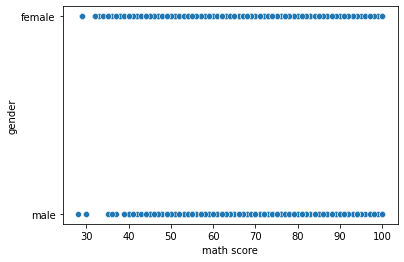

In [49]:
y1 = outlier["gender"]
x1 = outlier["math score"]
sns.scatterplot(x1,y1)

C:\Users\L470_2\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='math score', ylabel='parental level of education'>

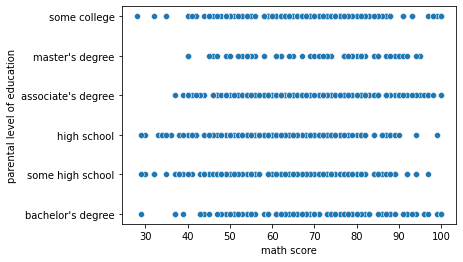

In [50]:
y1 = outlier["parental level of education"]

sns.scatterplot(x1,y1)

C:\Users\L470_2\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='math score', ylabel='test preparation course'>

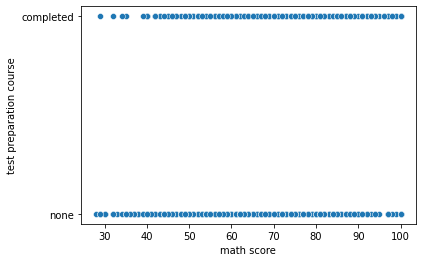

In [52]:
y1 = outlier["test preparation course"]
sns.scatterplot(x1,y1)

In [67]:
outlier.groupby(outlier["gender"])["math score"].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
female,508.0,64.409648,14.373242,29.0,54.0,65.0,74.0,100.0
male,480.0,68.800000,14.255263,28.0,59.0,69.0,79.0,100.0


In [62]:
x1 = data['gender']
y1 = data['math score']

Text(0.5, 0, 'Gender')

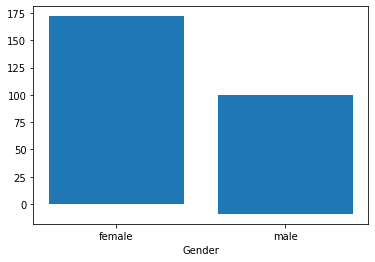

In [65]:
plt.bar(x1,y1)
plt.xlabel("Gender")

In [68]:
df = pd.read_csv("IRIS.csv")
df.mean()

C:\Users\L470_2\AppData\Local\Temp\ipykernel_10988\1542425771.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


sepal_length    5.843333
sepal_width     3.054000
petal_length    3.758667
petal_width     1.198667
dtype: float64

In [69]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [70]:
df.groupby(["species"])["sepal_length","sepal_width","petal_length","petal_width"].mean()

C:\Users\L470_2\AppData\Local\Temp\ipykernel_10988\1978971510.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(["species"])["sepal_length","sepal_width","petal_length","petal_width"].mean()


,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [71]:
df.groupby(["species"])["sepal_length","sepal_width","petal_length","petal_width"].median()

C:\Users\L470_2\AppData\Local\Temp\ipykernel_10988\3625186395.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(["species"])["sepal_length","sepal_width","petal_length","petal_width"].median()


,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,5.0,3.4,1.50,0.2
Iris-versicolor,5.9,2.8,4.35,1.3
Iris-virginica,6.5,3.0,5.55,2.0


In [77]:
x1 = df[df["species"] == "Iris-setosa"]["species"]
x2 = df[df["species"] == "Iris-setosa"]["sepal_length"]
y1 = df[df["species"] == "Iris-versicolor"]["species"]
y2 = df[df["species"] == "Iris-versicolor"]["sepal_length"]
z1 = df[df["species"] == "Iris-virginica"]["species"]
z2 = df[df["species"] == "Iris-virginica"]["sepal_length"]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


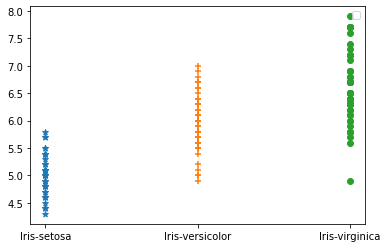

In [78]:
plt.scatter(x1,x2,marker="*")
plt.scatter(y1,y2,marker="+")
plt.scatter(z1,z2,marker="o")
plt.legend()
plt.show()

In [79]:
x1 = df[df["species"] == "Iris-setosa"]["species"]
x2 = df[df["species"] == "Iris-setosa"]["sepal_width"]
y1 = df[df["species"] == "Iris-versicolor"]["species"]
y2 = df[df["species"] == "Iris-versicolor"]["sepal_width"]
z1 = df[df["species"] == "Iris-virginica"]["species"]
z2 = df[df["species"] == "Iris-virginica"]["sepal_width"]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


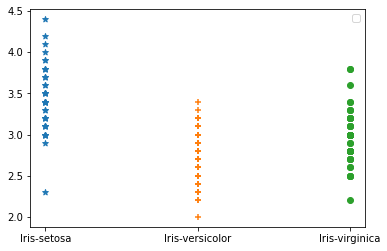

In [80]:
plt.scatter(x1,x2,marker="*")
plt.scatter(y1,y2,marker="+")
plt.scatter(z1,z2,marker="o")
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


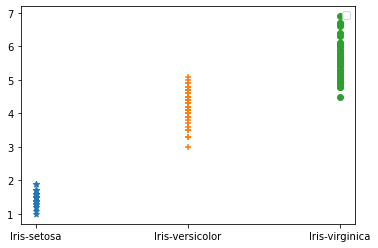

In [81]:
x1 = df[df["species"] == "Iris-setosa"]["species"]
x2 = df[df["species"] == "Iris-setosa"]["petal_length"]
y1 = df[df["species"] == "Iris-versicolor"]["species"]
y2 = df[df["species"] == "Iris-versicolor"]["petal_length"]
z1 = df[df["species"] == "Iris-virginica"]["species"]
z2 = df[df["species"] == "Iris-virginica"]["petal_length"]
plt.scatter(x1,x2,marker="*")
plt.scatter(y1,y2,marker="+")
plt.scatter(z1,z2,marker="o")
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


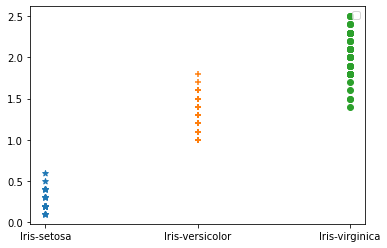

In [85]:
x1 = df[df["species"] == "Iris-setosa"]["species"]
x2 = df[df["species"] == "Iris-setosa"]["petal_width"]
y1 = df[df["species"] == "Iris-versicolor"]["species"]
y2 = df[df["species"] == "Iris-versicolor"]["petal_width"]
z1 = df[df["species"] == "Iris-virginica"]["species"]
z2 = df[df["species"] == "Iris-virginica"]["petal_width"]
plt.scatter(x1,x2,marker="*")
plt.scatter(y1,y2,marker="+")
plt.scatter(z1,z2,marker="o")
plt.legend()
plt.show()

In [86]:
df[df["petal_length"].between(1,2)]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [88]:
df[df["petal_length"].between(5,6)]

,sepal_length,sepal_width,petal_length,petal_width,species
77,6.7,3.0,5.0,1.7,Iris-versicolor
83,6.0,2.7,5.1,1.6,Iris-versicolor
100,6.3,3.3,6.0,2.5,Iris-virginica
101,5.8,2.7,5.1,1.9,Iris-virginica
102,7.1,3.0,5.9,2.1,Iris-virginica
103,6.3,2.9,5.6,1.8,Iris-virginica
104,6.5,3.0,5.8,2.2,Iris-virginica
108,6.7,2.5,5.8,1.8,Iris-virginica
110,6.5,3.2,5.1,2.0,Iris-virginica
111,6.4,2.7,5.3,1.9,Iris-virginica


In [89]:
df[df["petal_length"].between(3,5)]

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,Iris-versicolor
51,6.4,3.2,4.5,1.5,Iris-versicolor
52,6.9,3.1,4.9,1.5,Iris-versicolor
53,5.5,2.3,4.0,1.3,Iris-versicolor
54,6.5,2.8,4.6,1.5,Iris-versicolor
55,5.7,2.8,4.5,1.3,Iris-versicolor
56,6.3,3.3,4.7,1.6,Iris-versicolor
57,4.9,2.4,3.3,1.0,Iris-versicolor
58,6.6,2.9,4.6,1.3,Iris-versicolor
59,5.2,2.7,3.9,1.4,Iris-versicolor
